# Classification using decision trees

# Dataset description

In this assignment, we will look at decision trees for the classification problem, and talk about how to deal with unbalanced datasets.

The provided dataset contains information about accepted offers on loans in **Thera-Bank**. The main customers of the bank use the bank to deposit their money in it, i.e. they are depositors. At the same time, the big profit to the bank are the creditors - people who take a loan from the bank. Therefore, the bank wants to form favorable loan offers for its depositors. The bank's campaign for depositors last year showed that the conversion rate was more than 9,6%.

This prompted the marketing department to develop campaigns with improved target marketing to increase the probability of success with, of course, a minimal budget. The department would like to develop a classifier to help them identify potential customers who are more likely to purchase a loan. This would increase the probability of success while reducing the cost of the campaign.

The dataset contains both customer information and information about their response to the previous year's campaign:

*   **ID**: client ID

*   **Age**: Age

*   **Experience**: Work experience

*   **Income**: Annual income (in thousands)

*   **ZIP Code**: Residence index

*   **Family**: Family size

*   **CCAvg**: Average credit card spending per month (in thousands)

*   **Education**: Level of education (1: Bachelor's degree, 2: Master's degree, 3: something more)

*   **Mortgage**: Value of mortgage, if any (in thousands)

*   **Securities Account**: Existence of a securities account

*   **CD Account**: Existence of a certificate of deposit

*   **Online**: Whether the client uses internet banking

*   **CreditCard**: Whether the client uses a credit card issued by this bank

*   **Personal Loan**: Whether the client has accepted a personalized loan offer (target feature)

# Exploratory data analysis

Read the dataset into a dataframe

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv(os.path.join('data', 'Bank_Personal_Loan_Modelling_train.csv'))

In [3]:
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [4]:
dataframe.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The dataset contains 14 features, 1 of which is the target feature.

1 nominal feature: **ID**

5 numeric features: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 categorical features: **Family**, **Education**, **ZIP Code**

5 boolean features: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

There are no missing values.

Experience contains some negative values.

Remove the ID column, we won't need it.

In [5]:
dataframe = dataframe.drop(columns=['ID'])

In [6]:
dataframe.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


It makes sense to try to catch any correlations or lack thereof.

Build a correlation matrix.

In [7]:
dataframe.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994134,-0.047440,-0.030978,-0.033864,-0.040827,0.027489,-0.003468,-0.018537,0.000950,0.013890,0.027305,0.014137
Experience,0.994134,1.000000,-0.037976,-0.029845,-0.040127,-0.038459,-0.001394,-0.000700,-0.018108,0.000239,0.016445,0.026962,0.015945
Income,-0.047440,-0.037976,1.000000,-0.015647,-0.156319,0.641660,-0.192029,0.197115,0.497333,0.005082,0.179584,0.013222,0.008567
ZIP Code,-0.030978,-0.029845,-0.015647,1.000000,0.006110,-0.003104,-0.019697,0.003173,-0.007605,-0.000667,0.008082,0.008478,0.001413
Family,-0.033864,-0.040127,-0.156319,0.006110,1.000000,-0.103654,0.070498,-0.024184,0.063050,0.011535,0.019090,0.011682,0.010254
CCAvg,-0.040827,-0.038459,0.641660,-0.003104,-0.103654,1.000000,-0.133361,0.104529,0.365553,0.028449,0.145242,-0.003718,0.004311
Education,0.027489,-0.001394,-0.192029,-0.019697,0.070498,-0.133361,1.000000,-0.028436,0.134556,-0.013329,0.012545,-0.018219,-0.015894
Mortgage,-0.003468,-0.000700,0.197115,0.003173,-0.024184,0.104529,-0.028436,1.000000,0.140203,-0.002341,0.093418,0.007982,-0.002726
Personal Loan,-0.018537,-0.018108,0.497333,-0.007605,0.063050,0.365553,0.134556,0.140203,1.000000,0.030758,0.336931,0.010362,0.010184
Securities Account,0.000950,0.000239,0.005082,-0.000667,0.011535,0.028449,-0.013329,-0.002341,0.030758,1.000000,0.325264,0.014732,-0.021373


Identify the two most correlated features.

Age, Experience

Identify the feature that is least correlated (almost uncorrelated) with the other features (including target). Remove this feature from consideration.

Enter the name of the removed feature.

ZIP Code

In [8]:
dataframe = dataframe.drop(columns=['ZIP Code'])

In [9]:
dataframe.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,36,89,2,2.8,1,0,0,0,0,1,0
1,44,19,30,1,0.5,3,0,0,0,0,1,0
2,26,0,19,1,0.1,2,121,0,0,0,1,0
3,34,9,41,2,0.1,1,161,0,0,0,1,1
4,56,32,51,4,1.5,1,0,0,0,0,0,0


# Preliminary data preparation

## Feature modification

It is worth dealing with the <code>Experience</code> feature. You can see that experience correlates with age. However, there are negative values in the <code>Experience</code> column. It makes sense to "shift" the values in this column. Add the same number to all values in the <code>Experience</code> column so that the minimum value is equal to $0$.

Calculate the sample mean of the <code>Experience</code> column after transformation.

In [10]:
dataframe.loc[:, 'Experience'].min()

-3

In [11]:
dataframe['Experience'] = dataframe['Experience'] + 3

In [12]:
dataframe.loc[:, 'Experience'].mean()

23.19625

Similarly, it makes sense to modify the <code>CCAvg</code> feature. Since the annual income is considered, the value of spending should be considered for the whole year.

Calculate the sample mean of the <code>CCAvg</code> column after transformation.

In [13]:
dataframe['CCAvg'] = dataframe['CCAvg'] * 12

In [14]:
dataframe.loc[:, 'CCAvg'].mean()

23.06166

## Determining outliers

Construct boxplots for all predictors. We recommend using the <code>sns.boxplot()</code>. Identify the feature from the boxplot image in your individual assignment.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


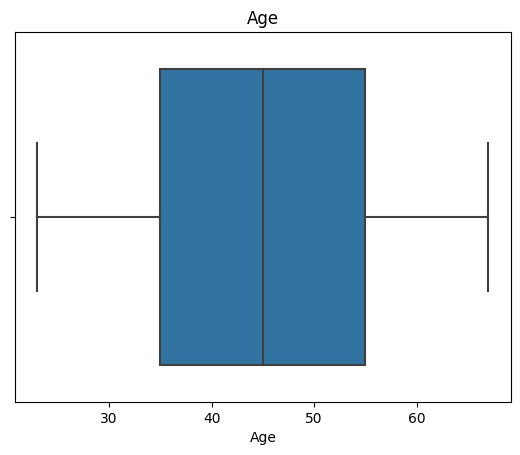

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


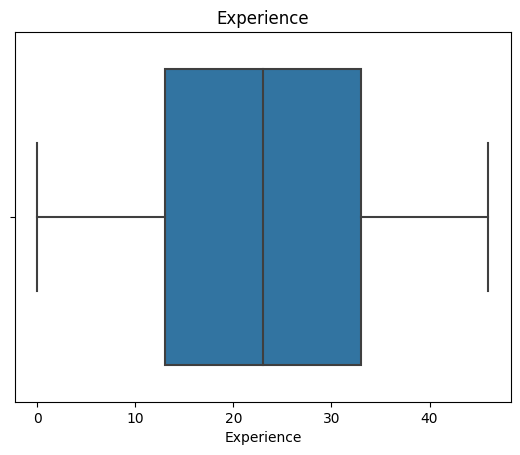

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


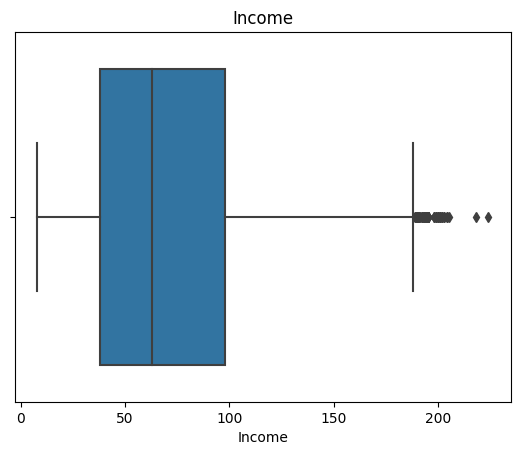

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


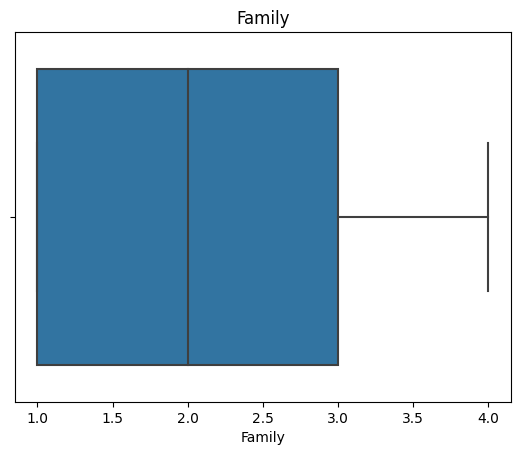

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


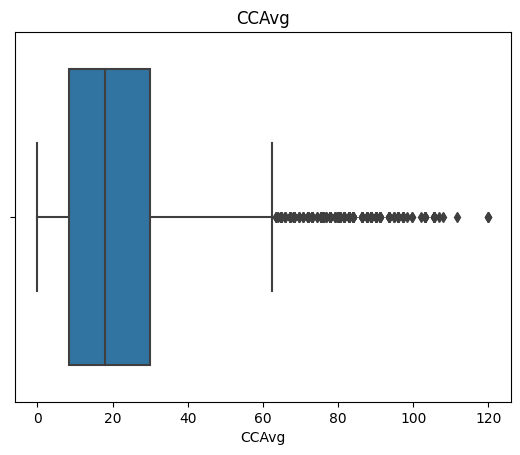

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


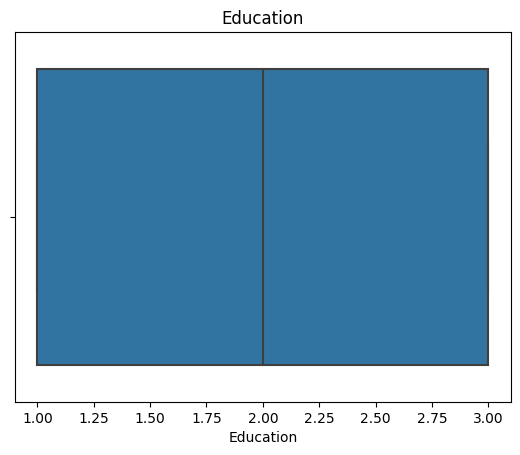

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


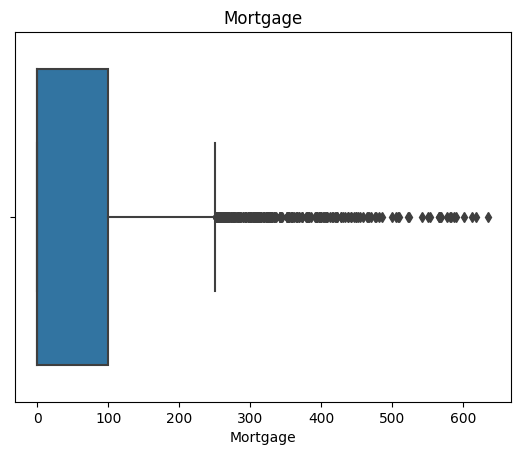

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


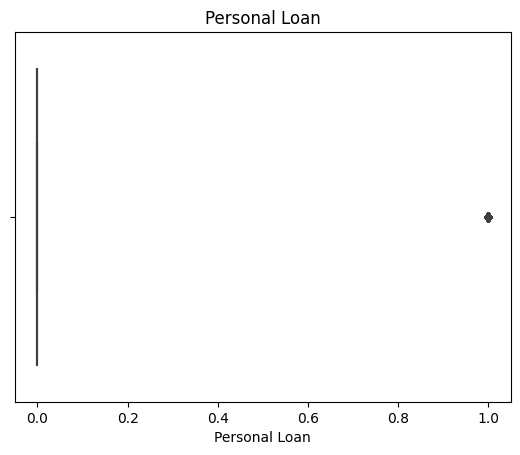

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


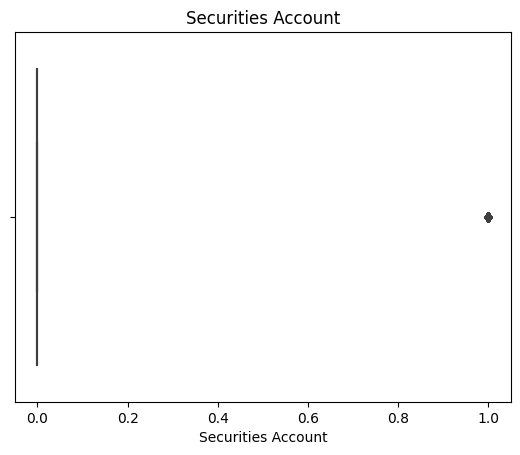

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


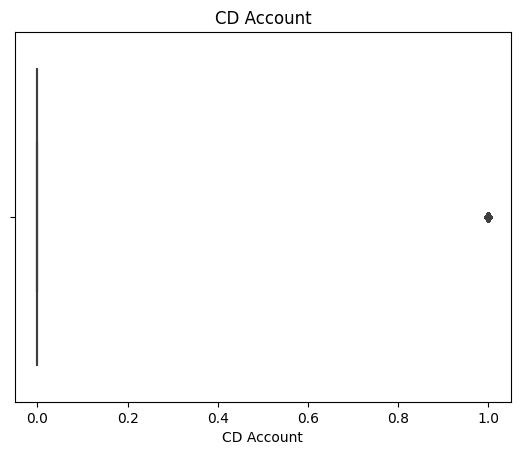

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


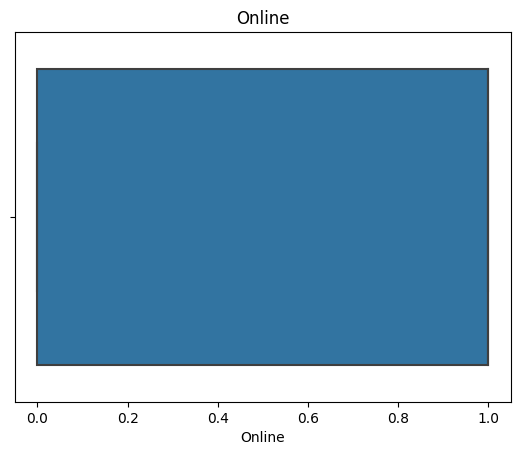

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


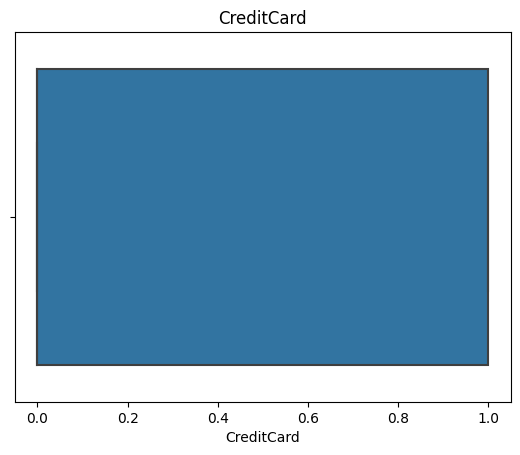

In [16]:
for col in dataframe.columns:
    sns.boxplot(data=dataframe, x=col)
    plt.title(col)
    plt.show()

Identify the feature containing the largest number of outliers. Enter the name of the feature.

Mortgage

It makes sense to work with this feature. For this purpose, the following statistical considerations can be used. If you subtract the sample mean from the data, and then divided by the standard deviation, then, using the $68-95-99.7$ rule under the assumption of normality of distribution, we can discard the tails that are too far from zero.
Construct a histogram of the distribution of values within this feature.

c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prazd\PRJ\study\study_itmo\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mortgage', ylabel='Count'>

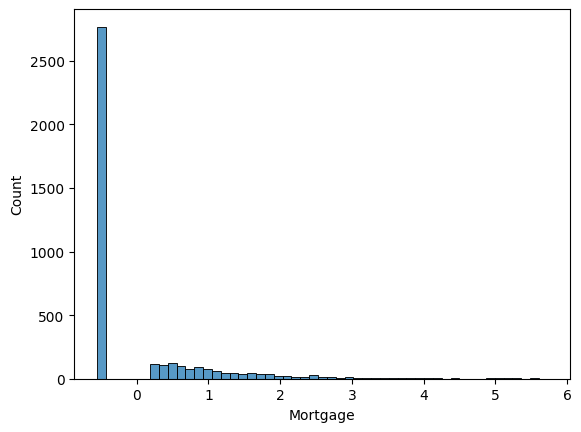

In [17]:
sns.histplot((dataframe.loc[:, 'Mortgage'] - dataframe.loc[:, 'Mortgage'].mean()) / dataframe.loc[:, 'Mortgage'].std())

Obviously, among the values of this feature there are a small number of values that lie "far away from the trend". We can use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> function from the <code>scipy</code> library.

Recalling the course of probability theory, it becomes clear that about $99.7\%$ of the normal distribution will be contained in the interval $[-3\sigma, 3\sigma]$. Determine the number of elements whose modulus of <code>z-score</code> is greater than $3$. 

In [18]:
from scipy.stats import zscore

In [19]:
_zscore = zscore(dataframe.loc[:, 'Mortgage'].values)

In [20]:
_zscore[np.abs(_zscore) > 3].shape[0]

83

So, there are not very many outliers, so they can simply be discarded from the provided dataset. Enter the remaining number of rows in the dataset.

In [21]:
dataframe = dataframe.loc[np.where(np.abs(_zscore) < 3)[0]]

In [22]:
dataframe.shape

(3917, 12)

# Model building

# Basic algorithm

Use <code>train_test_split</code> to split the dataset into training and test samples with the parameters from your individual assignment.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
dataframe.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0


In [25]:
stratify_arr = dataframe.loc[:, 'Personal Loan'].values
X_train, X_test, y_train, y_test = train_test_split(
    dataframe.drop(columns=['Personal Loan']),
    dataframe.loc[:, 'Personal Loan'].values,
    test_size=0.2,
    random_state=21,
    stratify=stratify_arr
)

Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(random_state=21, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_test, clf.predict(X_test))

0.8985507246376812

In [30]:
clf = DecisionTreeClassifier(random_state=21, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=21)

In [31]:
f1_score(y_test, clf.predict(X_test))

0.8823529411764706

## Consideration of class ratio imbalance

And now, if we remember that the dataset is unbalanced, we can specify an additional parameter <code>class_weight</code>. Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [32]:
clf = DecisionTreeClassifier(random_state=21, criterion='gini', class_weight='balanced')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=21)

In [33]:
f1_score(y_test, clf.predict(X_test))

0.9064748201438848

In [34]:
clf = DecisionTreeClassifier(random_state=21, criterion='entropy', class_weight='balanced')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=21)

In [35]:
f1_score(y_test, clf.predict(X_test))

0.8905109489051095

## Upsampling of training dataset

In addition to the obvious assignment of weights to unbalanced classes, we can use the algorithm <code>SMOTE</code>. It receives instances of all classes with their labels as input, and in turn tries to extrapolate the data distribution of that class itself based on them. It then samples new class objects until the number of objects of each class is the same.

It turns out that in this case a balanced sample will be obtained, and there will be no need to fiddle with weights and so on. 

Determine the proportion of elements of class $0$ of the training dataset.

In [36]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2855,  278], dtype=int64))

In [37]:
2855 / (2855 + 278)

0.9112671560804341

Using the <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> class from the <code>imblearn.over_sampling</code> module, balance the training dataset with the parameters from your individual assignment.

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(random_state=21)
X_train, y_train = sm.fit_resample(X_train, y_train)

Make sure that the dataset now contains the same number of representatives of both classes.

Enter the number of objects of class $1$ of the training dataset after the upsampling.

In [40]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2855, 2855], dtype=int64))

In [42]:
2855 / (2855 + 2855)

0.5

Re-train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [43]:
clf = DecisionTreeClassifier(random_state=21, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [44]:
f1_score(y_test, clf.predict(X_test))

0.8026315789473685

In [49]:
clf = DecisionTreeClassifier(random_state=21, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=21)

In [50]:
f1_score(y_test, clf.predict(X_test))

0.7894736842105263